<a href="https://colab.research.google.com/github/prishi29/Machine_Learning/blob/main/HumanActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human Activity Recognition




Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.

Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting. They may also be more focused activities such as those types of activities performed in a kitchen or on a factory floor.

The sensor data may be remotely recorded, such as video, radar, or other wireless methods. Alternately, data may be recorded directly on the subject such as by carrying custom hardware or smart phones that have accelerometers and gyroscopes.

**Accelerometers** is an electronic sensor that measures the acceleration forces acting on an object, in order to determine the object’s position in space and monitor the object’s movement

**Gyroscope** is a device that can measure and maintain the orientation and angular velocity of an object. These are more advanced than accelerometers. These can measure the tilt and lateral orientation of the object whereas accelerometer can only measure the linear motion.

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. 


**Attribute Information:**
For each record in the dataset it is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
An identifier of the subject who carried out the experiment.
### Main features '-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

1. The angleXgravityMean represents the effect of acceleration along x-axis due to gravity.
2. The angleYgravityMean represents the effect of acceleration along y-axis due to gravity.
3. The angleZgravityMean represents the effect of acceleration along z-axis due to gravity.

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

The dataset is already divided in training and testing datasets

In [ ]:
#Loading the training and testing datasets
train=pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

#Data Cleaning

In [ ]:
#Checking the shape of training and testing datasets
print("Shape of the training dataset :",train.shape)
print("Shape of the training dataset :",test.shape)

Shape of the training dataset : (7352, 563)
Shape of the training dataset : (2947, 563)


In [ ]:
#Checking the first 5 rows
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
#Checking the data type of each variable
train.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object



*   Most of the predictors are of float type
*   The target variable 'activity' is of object type 



In [ ]:
#Checking the number of features in both training and testing dataset
features = train.columns
print("The number of features in training dataset:",len(features))
features_t = test.columns
print("The number of features in testing dataset:",len(features_t))

The number of features in training dataset: 563
The number of features in testing dataset: 563


In [ ]:
#Changing the variable names for easier analysis
features = features.str.replace('[()]','')
features = features.str.replace('[-]','')
features = features.str.replace('[,]','')

train.columns = features
test.columns = features

train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
#Renaming the target variable from 'Activity' to 'activity' for consistency
train.rename(columns={'Activity':'activity'},inplace = True)
test.rename(columns={'Activity':'activity'},inplace = True)
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'activity'],
      dtype='object', length=563)

In [ ]:
#Checking the number of unique values in each column
train.nunique()

tBodyAccmeanX        7347
tBodyAccmeanY        7352
tBodyAccmeanZ        7349
tBodyAccstdX         7349
tBodyAccstdY         7351
                     ... 
angleXgravityMean    7352
angleYgravityMean    7352
angleZgravityMean    7352
subject                21
activity                6
Length: 563, dtype: int64

In [ ]:
#Lets see the unique values of our target variable 'activity'
print(train['activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [ ]:
#Checking the descriptive statistics summary
train.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
# for i in features:
#   print(i)

CHECKING FOR MISSING VALUES AND DUPLICATES

In [ ]:
print("The total number of missing values in training dataset:",train.isnull().values.sum())
print("The total number of missing values in testing dataset:",test.isnull().values.sum())

The total number of missing values in training dataset: 0
The total number of missing values in testing dataset: 0


In [ ]:
print("The total number of duplicates in training dataset:",train.duplicated().sum())
print("The total number of duplicates in testing dataset:",test.duplicated().sum())

The total number of duplicates in training dataset: 0
The total number of duplicates in testing dataset: 0




*   There are no missing values in our dataset
*   There are no duplicate values in our dataset



CHECKING FOR IMBALANCE IN THE DATASET

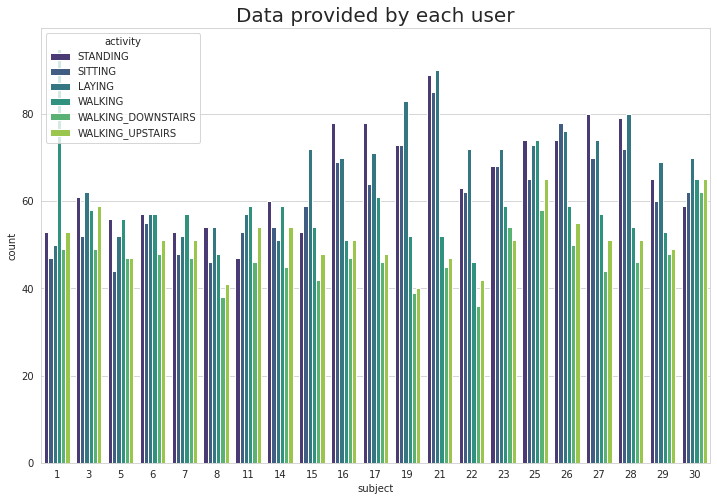

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='activity', palette='viridis', data=train)
plt.show()

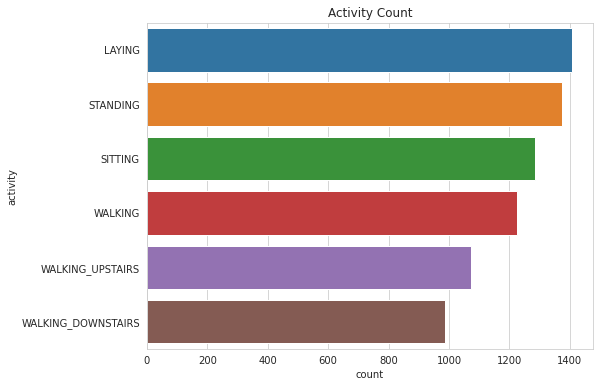

In [ ]:
desc= train['activity'].value_counts().sort_values(ascending=False).index
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.title("Activity Count")
sns.countplot(y='activity',data=train,order=desc)
plt.show()

- We have got almost same number of reading from all the 30 subjects which 
indicates that the data is more or less balanced and it does not require resampling.
- The data points per activity is also quite balanced.

In [ ]:
# def my_fun(value):
#     if value['activity'] == 'LAYING' or 'SITTING' or 'STANDING':
#         return "Static"
#     elif value['activity'] == 'WALKING' or 'WALKING_UPSTAIRS' or 'WALKING_DOWNSTAIRS':
#         return 'Dynamic'

In [ ]:
# train['movement']=train.apply(my_fun,axis=1)

In [ ]:
# train.head()

In [ ]:
# train['movement'].unique()

#Exploratory Data Analysis (EDA)

In [ ]:
#Lets check the importance of each sensor
Acc = 0
Gyro = 0
Others = 0
for i in train.columns:
  if 'Acc' in i:
    Acc = Acc+1
  elif 'Gyro' in i:
    Gyro = Gyro+1
  else:
    Others = Others+1

In [ ]:
plt.figure(figsize=(8,6))
px.bar(x=['Accelerometer ','Gyroscope ','Others'],y=[Acc,Gyro,Others],color=[Acc,Gyro,Others], 
       title = 'Sensors importance',width=600, height=600)  


<Figure size 576x432 with 0 Axes>



- The most used sensor is Accelerometer followed by Gyroscope and others are irrelevant
- Our analysis will mostly be focused on Accelerometer 



Lets divide our Activities into STATIC and DYNAMIC activities

- STATIC : Sitting, Standing, Laying
- DYNAMIC : Walking, Walking_downstairs, Walking_Upstairs

In [ ]:
mapping = {
    'LAYING': 'Static',
    'SITTING': 'Static',
    'STANDING': 'Static',
    'WALKING' : 'Dynamic',
    'WALKING_UPSTAIRS' : 'Dynamic',
    'WALKING_DOWNSTAIRS' : 'Dynamic'
}
train['movement'] = train['activity'].replace(mapping)
train['movement'].unique()

array(['Static', 'Dynamic'], dtype=object)

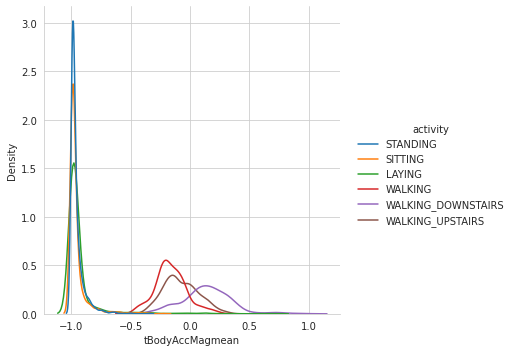

In [ ]:
#Lets visualize the probability density plot of tBodyAccMagmean for each activity

sns.displot(data=train,x='tBodyAccMagmean',hue='activity',kind='kde',fill=False)

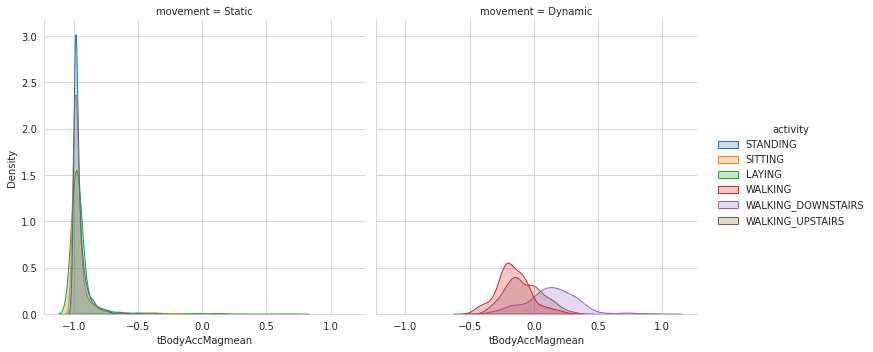

In [ ]:
#Lets visualise the density plot for static and dynamic activities separately
sns.displot(data=train,x='tBodyAccMagmean',hue='activity',kind='kde',col='movement',fill=True)


We can notice a clear difference between the static and dynamic activities
- When tBodyAccMagmean <= -0.5 then movement is Static
- When tBodyAccMagmean >= -0.5 then movement is Dynamic
*   When movement is static the distribution plot is Left Skewed which implies that mean is less than the median
*   When movement is Dynamic the skewness is different for each activity but the skewness is not extreme and hence less significant



In [ ]:
# m_count = train_t['movement'].value_counts()
# print(m_count)

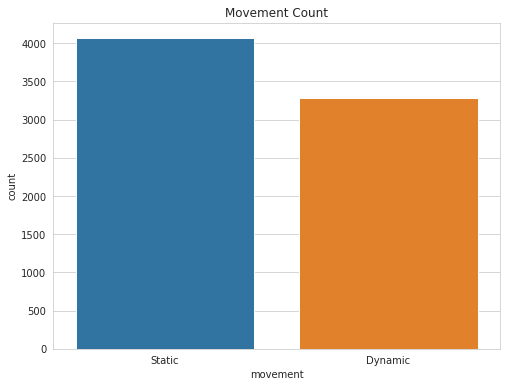

In [ ]:
#Lets visualize the static and dynamic activities
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.title("Movement Count")
sns.countplot(x='movement',data=train)
plt.show()

- The number of datapoints for static activities are higher than the dynamic activities



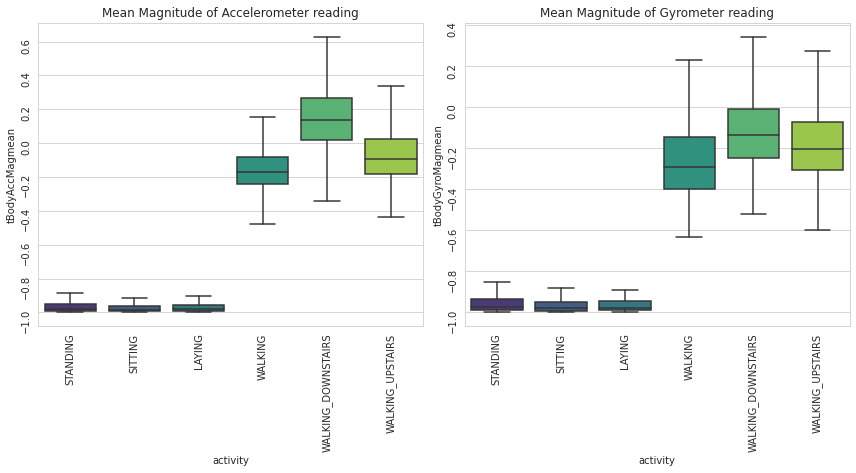

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,7))
s1=sns.boxplot(data=train,x="activity", y="tBodyAccMagmean",palette='viridis',showfliers=False,ax=axes[0])
s2=sns.boxplot(data=train,x="activity", y="tBodyGyroMagmean",palette='viridis',showfliers=False,ax=axes[1])
axes[0].set_title('Mean Magnitude of Accelerometer reading')
axes[1].set_title('Mean Magnitude of Gyrometer reading')
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
plt.tight_layout()
fig.subplots_adjust(top=0.9)


**Accelerometer Reading Inference**
*   When the magnitude of the tBodyAccelerationMean is < -0.8 then activity is standing, sitting or laying.(Static)
*   When the magnitude of the tBodyAccelerationMean is > -0.6 then activity is walking, walking_downstairs, walking upstairs(Dynamic)
- When the magnitude of the tBodyAccelerationMean is > 0.0 (positive) then activity is walking_downstairs.

**Gyrometer Reading Inference**
- When the magnitude of the tBodyGyroMean is < -0.8 then activity is standing, sitting or laying.
*   When the magnitude of the tBodyAccelerationMean is > -0.6 then almost all the activity is walking, walking_downstairs, walking upstairs

The readings of both accelerometer and gyrometer indicates that the activities can be divided into two groups (static and dynamic) as we have seen earlier.




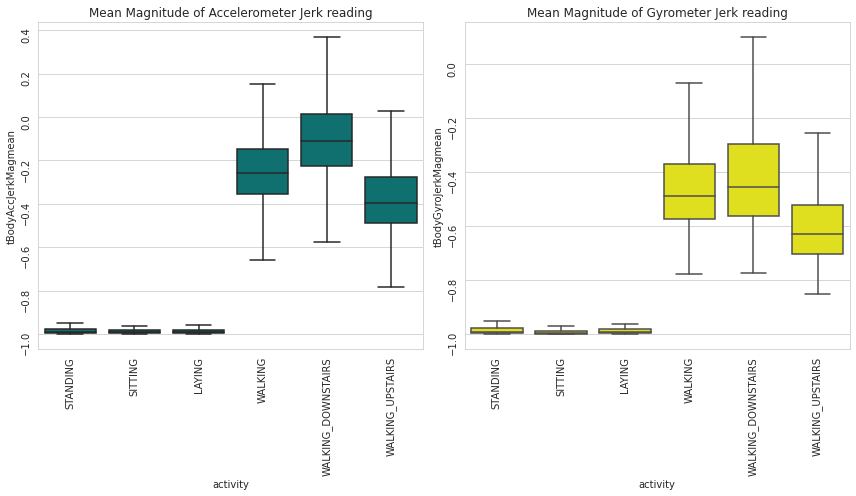

In [ ]:
fig1,axes = plt.subplots(1,2,figsize=(12,7))
s3=sns.boxplot(data=train,x="activity", y="tBodyAccJerkMagmean",color='Teal',showfliers=False,ax=axes[0])
s4=sns.boxplot(data=train,x="activity", y="tBodyGyroJerkMagmean",color='Yellow',showfliers=False,ax=axes[1])
axes[0].set_title('Mean Magnitude of Accelerometer Jerk reading')
axes[1].set_title('Mean Magnitude of Gyrometer Jerk reading')
for ax in fig1.axes:
    ax.tick_params(labelrotation=90)
plt.tight_layout()
fig.subplots_adjust(top=0.9)



*   Almost all the mean magnitude of both the sensor readings are negative.
*   When the mean magnitude of the tBodyAccJerk or tBodyGyroJerk is < -0.8 then activity is standing, sitting or laying.
- When the mean magnitude of the tBodyAccJerk is > -0.6 then activity is walking, walking downstairs or walking upstairs.
- When the mean magnitude of the tBodyGyroJerk is > -0.8 then activity is walking, walking downstairs or walking upstairs.



###The GravitySensor class is an Accelerometer's subclass. The GravitySensor's latest reading contains device’s acceleration due to the effect of gravity force about the corresponding axes.

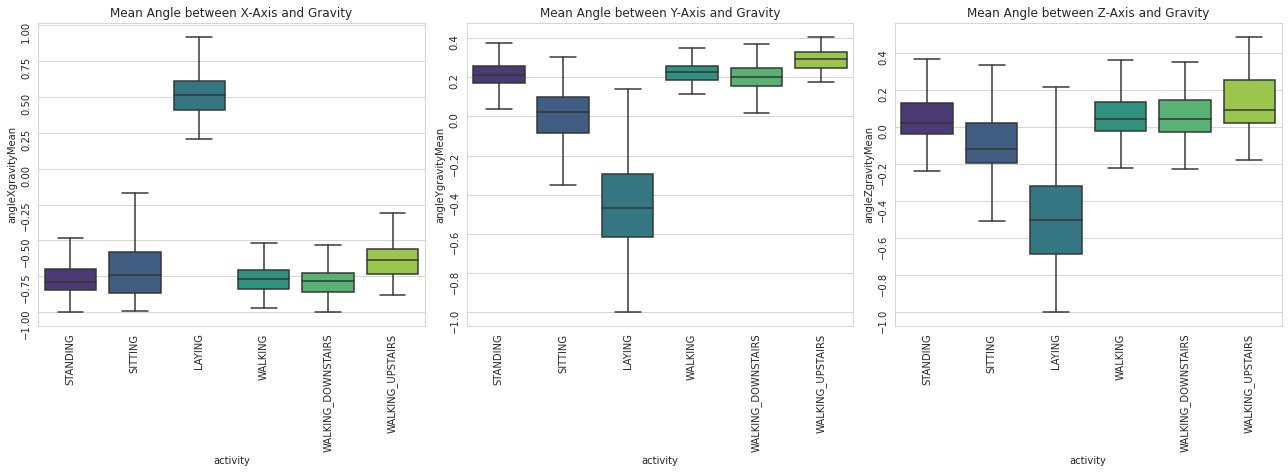

In [ ]:
fig1 ,axes = plt.subplots(1,3,figsize=(18,7))
s3=sns.boxplot(data=train,x="activity", y="angleXgravityMean",palette='viridis',showfliers=False,ax=axes[0])
s4=sns.boxplot(data=train,x="activity", y="angleYgravityMean",palette='viridis',showfliers=False,ax=axes[1])
s5=sns.boxplot(data=train,x="activity", y="angleZgravityMean",palette='viridis',showfliers=False,ax=axes[2])
axes[0].set_title('Mean Angle between X-Axis and Gravity')
axes[1].set_title('Mean Angle between Y-Axis and Gravity')
axes[2].set_title('Mean Angle between Z-Axis and Gravity')
for ax in fig1.axes:
    ax.tick_params(labelrotation=90)
plt.tight_layout()
fig1.subplots_adjust(top=0.9)



*   When the mean angle between X-axis and gravity is > 0.0(i.e. positive) , then the activity is laying and if < 0.0 (i.e. negative) then it can be any other activity.
*  When the mean angle between Y-axis and gravity is < 0.2 then the activity is laying and if > 0.2 (i.e. negative) then it can be any other activity.
*  Similarly when the mean angle between Z-axis and gravity is < 0.2 then the activity is laying and if > 0.2 (i.e. negative) then it can be any other activity.



#Dimentionality reduction using Principal Component Analysis (PCA)

In [ ]:
#Lets change the categorical variable 'activity' from labels to numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['activity'] = le.fit_transform(train['activity'])
test['activity'] = le.fit_transform(test['activity'])

In [ ]:
train['activity'].unique()

array([2, 1, 0, 3, 4, 5])

In [ ]:
#Dividing the predicting variables and the target variables for the training and testing dataset
x_train = train.drop(['subject', 'activity','movement'], axis=1)
y_train = train['activity']
x_test = test.drop(['subject','activity'],axis=1)
y_test = test['activity']



*   Our Target Variable is Activity
*   The other variables except subject are Predictors or features



In [ ]:
#Lets see the shape of the frequency domain attributes and time domain attributes
f_df = train.loc[:, train.columns.str.contains('^f|^a|^s')]
t_df = train.loc[:, train.columns.str.contains('^t|^a|^s')]
print("The shape of the frequency domain attributes is: ",f_df.shape)
print("The shape of the time domain attributes is: ",t_df.shape)

The shape of the frequency domain attributes is:  (7352, 298)
The shape of the time domain attributes is:  (7352, 274)


In [ ]:
#Printing the total number of t and f features
x_f = f_df.drop(['subject', 'activity'], axis=1)
y_f = f_df['activity']

x_t = t_df.drop(['subject', 'activity'], axis=1)
y_t = t_df['activity']

print("Total number of f features :",x_f.shape[1])
print("Total number of t features :",x_train.shape[1]-x_f.shape[1])

Total number of f features : 296
Total number of t features : 265


In [ ]:
# performing preprocessing part
# from sklearn.preprocessing import StandardScaler
# std_sc = StandardScaler()
  
# x_train_scaled = std_sc.fit_transform(x_train)
# x_test_scaled = std_sc.transform(x_test)


We will not be standardizing our dataset since the dataset is quite balanced in nature

In [ ]:
# Applying PCA function 
from sklearn.decomposition import PCA
  
pca = PCA(n_components=0.99)#Accounting for 99% of the variance in the dataset

x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)

In [ ]:
# x_train_scaled

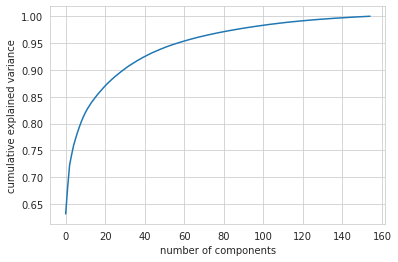

In [ ]:
pca = PCA().fit(x_train_reduced)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#The explained variance ratio is the percentage 
#of variance that is attributed by each of the selected components.
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
# pca = PCA().fit(x_reduced)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

In [ ]:
print("Total number of original features :",x_train.shape[1])
print("Total number of reduced features :",x_train_reduced.shape[1])
# print("Total number of original features for entire dataset :",x_tot.shape[1])
# print("Total number of reduced features for entire dataset :",x_reduced.shape[1])

Total number of original features : 561
Total number of reduced features : 155


From the graph we can see that around 25 components contribute to 85% of the variance of the data and 155 components contributes to 100% of the variance of te data.

In [ ]:
# from sklearn.model_selection import train_test_split
  
# x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tot, y_tot, test_size = 0.2,shuffle=True, random_state = 42)
# x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y_tot, test_size = 0.2,shuffle=True, random_state = 42)

# MODELING

In [ ]:
#importing the necessary libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creating a function to plot the confusion martrix for all classification models before and after PCA
labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS']
def confusion_mat(model,model_pca,name, x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced):
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].set_title("Confusion Matrix before PCA")
    ax[1].set_title("Confusion Matrix after PCA")
    actual = y_test
    predicted1 = model.predict(x_test)
    predicted2 = model_pca.predict(x_test_reduced)
    cm1 = metrics.confusion_matrix(actual, predicted1)
    cm2 = metrics.confusion_matrix(actual, predicted2)
    p_right1 = np.trace(cm1)
    p_wrong1 = np.sum(cm1)-np.trace(cm1)
    p_right2 = np.trace(cm2)
    p_wrong2 = np.sum(cm2)-np.trace(cm2)
    cm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = labels)
    cm2_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = labels)
    fig.tight_layout(pad=3.5)
    ax[0].grid(False)
    ax[1].grid(False)
    cm1_display.plot(ax=ax[0],xticks_rotation=90,cmap='RdPu')#cividis
    cm2_display.plot(ax=ax[1],xticks_rotation=90,cmap='GnBu')#viridis
    print("Right Classification before PCA:", p_right1)
    print("Right Classification after PCA :", p_right2)
    print("Wrong Classification before PCA :", p_wrong1)
    print("Wrong Classification after PCA:", p_wrong2)

In [ ]:
#Creating a function print the classification report for each classification model
from sklearn import metrics
def evaluate_classification(model,model_pca,name, x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced):
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    precision = metrics.precision_score(y_test,model.predict(x_test),average='macro')
    recall = metrics.recall_score(y_test,model.predict(x_test),average='macro')
    f1score = metrics.f1_score(y_test,model.predict(x_test),average='macro')
    train_accuracy1 = model_pca.score(x_train_reduced,y_train)
    test_accuracy1 = model_pca.score(x_test_reduced,y_test)
    precision1 = metrics.precision_score(y_test,model_pca.predict(x_test_reduced),average='macro')
    recall1 = metrics.recall_score(y_test,model_pca.predict(x_test_reduced),average='macro')
    f1score1 = metrics.f1_score(y_test,model_pca.predict(x_test_reduced),average='macro')
    df = pd.DataFrame({"Train_Score":[train_accuracy,train_accuracy1],
                       "Accuracy(Test_Score)":[test_accuracy,test_accuracy1],
                       "Precision":[precision,precision1],
                       "Recall":[recall,recall1],
                       "F1 Score":[f1score,f1score1]},index=["Without pca","With pca"])
    print("Classification Report for",name)
    return df


#1. Logistic Regression

Right Classification before PCA: 2824
Right Classification after PCA : 2818
Wrong Classification before PCA : 123
Wrong Classification after PCA: 129


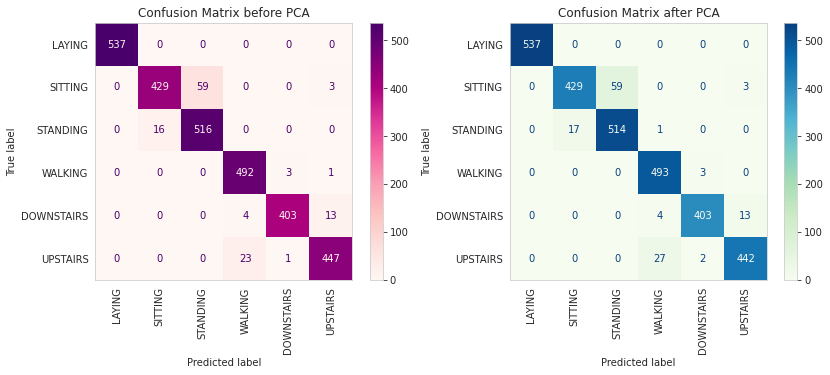

In [ ]:
lr = LogisticRegression().fit(x_train, y_train)
lr1 = LogisticRegression().fit(x_train_reduced, y_train)
confusion_mat(lr,lr1,"Logistic Regression", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)

In [ ]:
a=evaluate_classification(lr,lr1,"Logistic Regression", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
a

Classification Report for Logistic Regression


,Train_Score,Accuracy(Test_Score),Precision,Recall,F1 Score
Without pca,0.990751,0.958263,0.960491,0.957359,0.958188
With pca,0.990207,0.956227,0.958462,0.955299,0.956119


#2. K Nearest Neighbours

Right Classification before PCA: 2653
Right Classification after PCA : 2657
Wrong Classification before PCA : 294
Wrong Classification after PCA: 290


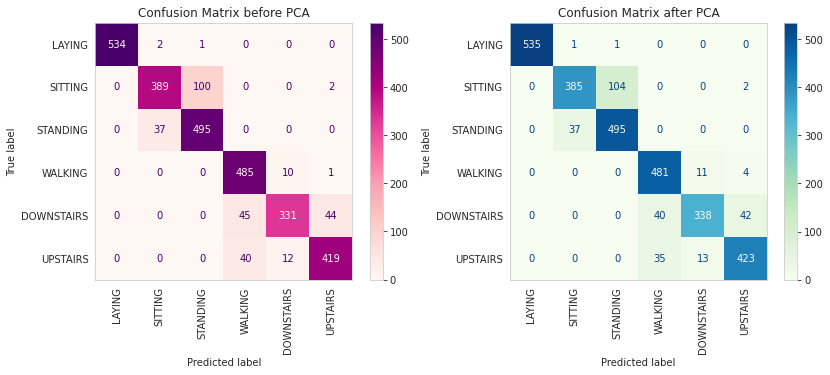

In [ ]:
knn = KNeighborsClassifier().fit(x_train, y_train)
knn1 = KNeighborsClassifier().fit(x_train_reduced, y_train)
confusion_mat(knn,knn1,"K Nearest Neighbours", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)

In [ ]:
b=evaluate_classification(knn,knn1,"K Nearest Neighbours", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
b

Classification Report for K Nearest Neighbours


,Train_Score,Accuracy(Test_Score),Precision,Recall,F1 Score
Without pca,0.984222,0.900238,0.904519,0.895440,0.897020
With pca,0.983950,0.901595,0.905344,0.897242,0.898689


#3. Naive Bayes

Right Classification before PCA: 2270
Right Classification after PCA : 2370
Wrong Classification before PCA : 677
Wrong Classification after PCA: 577


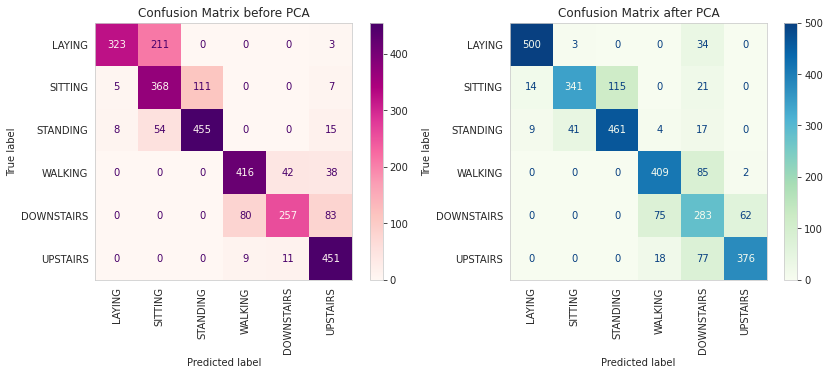

In [ ]:
nb = GaussianNB().fit(x_train, y_train)
nb1 = GaussianNB().fit(x_train_reduced, y_train)
confusion_mat(nb,nb1,"Naive Bayes", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)

In [ ]:
c=evaluate_classification(nb,nb1,"Naive Bayes", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
c

Classification Report for Naive Bayes


,Train_Score,Accuracy(Test_Score),Precision,Recall,F1 Score
Without pca,0.746328,0.770275,0.792466,0.769066,0.767235
With pca,0.878128,0.804208,0.808720,0.798141,0.799992


#4. Decision Tree

Right Classification before PCA: 2535
Right Classification after PCA : 2353
Wrong Classification before PCA : 412
Wrong Classification after PCA: 594


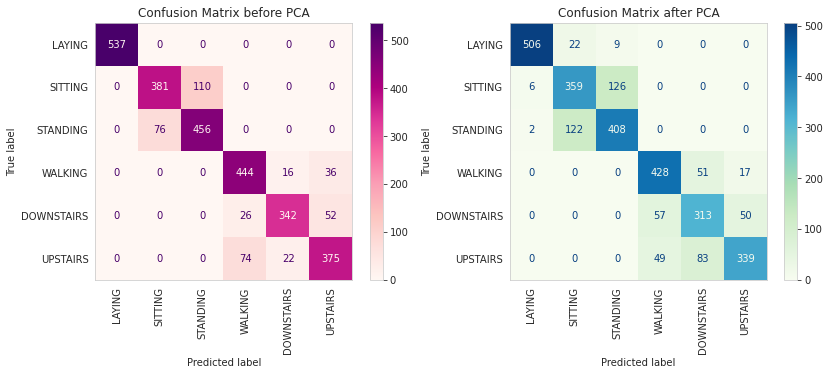

In [ ]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
dt1 = DecisionTreeClassifier().fit(x_train_reduced, y_train)
confusion_mat(dt,dt1,"Decision Tree", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)

In [ ]:
d=evaluate_classification(dt,dt1,"Decision Tree", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
d

Classification Report for Decision Tree


,Train_Score,Accuracy(Test_Score),Precision,Recall,F1 Score
Without pca,1.0,0.860197,0.860911,0.856456,0.857707
With pca,1.0,0.798439,0.797705,0.794706,0.795081


#5. Random Forest

Right Classification before PCA: 2710
Right Classification after PCA : 2686
Wrong Classification before PCA : 237
Wrong Classification after PCA: 261


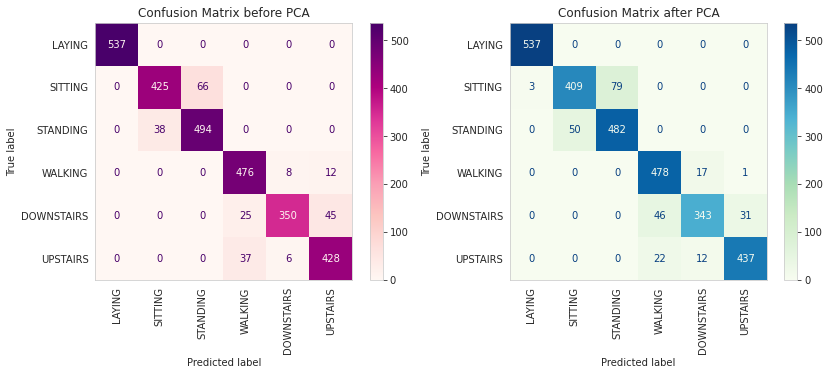

In [ ]:
rf = RandomForestClassifier().fit(x_train, y_train)
rf1 = RandomForestClassifier().fit(x_train_reduced, y_train)
confusion_mat(rf,rf1,"Random Forest", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)

In [ ]:
e=evaluate_classification(rf,rf1,"Random Forest", x_train, x_test, y_train, y_test,x_train_reduced,x_test_reduced)
e

Classification Report for Random Forest


,Train_Score,Accuracy(Test_Score),Precision,Recall,F1 Score
Without pca,1.0,0.919579,0.921473,0.915978,0.917450
With pca,1.0,0.911435,0.912327,0.907866,0.908943


In [ ]:
#Creating two lists of accuracy scores before and after PCA
x = [a,b,c,d,e]
accuracy = []
accuracy_pca = []
for i in x:
  value = np.round(i._get_value('Without pca','Accuracy(Test_Score)')*100,2)
  value_pca = np.round(i._get_value('With pca','Accuracy(Test_Score)')*100,2)
  accuracy.append(value)
  accuracy_pca.append(value_pca)

In [ ]:
#Creating a dataframe of the accuracy scores before and after PCA for each model in descending order of accuracy
report = {'Algorithm':['Logistic Regression','K Nearest Neighbours','Naive Bayes Classifier','Decision Tree Classifier','Random Forest Classifier'],
          'Accuracy_before_pca(%)':accuracy,
          'Accuracy_after_pca(%)':accuracy_pca}
final_report = pd.DataFrame(report) 
final_report.sort_values(by=['Accuracy_after_pca(%)'],ascending=False)

,Algorithm,Accuracy_before_pca(%),Accuracy_after_pca(%)
0,Logistic Regression,95.83,95.62
4,Random Forest Classifier,91.96,91.14
1,K Nearest Neighbours,90.02,90.16
2,Naive Bayes Classifier,77.03,80.42
3,Decision Tree Classifier,86.02,79.84


#RESULTS

1. Logistic Regression has the highest accuracy in classifying the activities with 95.83% before PCA and 95.62% after PCA.
2. Decision Tree has the lowest accuracy in classifying the activities with 85.07% before PCA and 80.15% after PCA.